In [ ]:
# To-Do
#1)

In [1]:
# Import the needed libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5

from tensorflow.keras import datasets, layers, models

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2, l1
from keras.utils import normalize, to_categorical
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

import sys
sys.path.insert(0, '/home/btannenw/Desktop/ML/dihiggsMLProject/')
from utils.commonFunctions import *

Using TensorFlow backend.


In [2]:
# Get image data
hh_h5  = h5.File('/home/btannenw/Desktop/ML/dihiggsMLProject/convolutionalNN/test_pp2hh4b_25k_composite_15pixel/images/test_pp2hh4b_25k_composite_15pixel_allImages.h5', 'r')
qcd_h5 = h5.File('/home/btannenw/Desktop/ML/dihiggsMLProject/convolutionalNN/test_ppTo4b_50k_composite_15pixel/images/test_ppTo4b_50k_composite_15pixel_allImages.h5', 'r')

In [ ]:
# Make composite dihiggs images
#hh_combImages = []
##for iEvt in range(0, len(hh_imgs['trackImgs'])):
#for iEvt in range(0, 5000):
#    if iEvt%500 == 0:
#        print('Processed {} dihiggs events'.format(iEvt) )
#    hh_combImages.append( np.stack( (hh_imgs['trackImgs'][iEvt], hh_imgs['nHadronImgs'][iEvt], hh_imgs['photonImgs'][iEvt]), axis=-1) )
#print(len(hh_combImages))

#hh = np.stack( (hh_combImages), axis=0)

In [20]:
# Read data
nEvents = 24000
hh = hh_h5['compositeImgs'][:nEvents]
qcd = qcd_h5['compositeImgs'][:nEvents]

#hh  = np.asarray( [ img for img, njets in zip(hh_h5['compositeImgs'], hh_h5['nJets']) if njets >= 4 ] )
#qcd  = np.asarray( [ img for img, njets in zip(qcd_h5['compositeImgs'], qcd_h5['nJets']) if njets >= 4 ] )
#hh  = np.asarray( [ img for img in hh_h5['compositeImgs'] ] )
#qcd  = np.asarray( [ img for img in qcd_h5['compositeImgs'] ] )


#hh = []
#nEvts = len(hh_h5['nJets'])
#for iEvt in range(0, nEvts):
#    if (100*(iEvt+1)/nEvts)%10 == 0:
#        print( 'Processed {}% hh...'.format( (100*(iEvt+1))/nEvts))
#    if hh_h5['nJets'][iEvt]>3:
#        hh.append(hh_h5['compositeImgs'][iEvt])

        

In [21]:
#nEvents = min(len(hh), len(qcd))
#nEvents = min(len(hh_imgs['compositeImgs']), len(qcd_imgs['compositeImgs']))

# Make labels
hh_labels = np.ones( nEvents )
qcd_labels = np.zeros( nEvents )

# Make combined dataset
all_images = np.concatenate ( (hh.copy(), qcd.copy()), axis=0)
all_labels = np.concatenate ( (hh_labels.copy(), qcd_labels.copy()), axis=0)
print(all_images.shape, all_labels.shape)

#all_images, all_labels = shuffle(all_images, all_labels, random_state=0)
imgs_train, imgs_test, labels_train, labels_test = train_test_split(all_images, all_labels, test_size=0.1, shuffle= True, random_state=30)

(48000, 15, 15, 3) (48000,)


In [36]:
model = Sequential()

# convolutional part
model.add( Conv2D(16, (3, 3), activation='relu', input_shape=(15, 15, 3)) )
model.add( MaxPooling2D((2, 2)) )
model.add( Conv2D(32, (3, 3), activation='relu'))
model.add( MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# feed-forward part
model.add( Flatten())
model.add( Dense(64, activation='relu'))
model.add( BatchNormalization() )
model.add( Dense(64, activation='relu'))
#model.add( Dropout(0.2) )
model.add( Dense(1) )


In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 13, 13, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)               

In [38]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
history = model.fit(imgs_train, labels_train, epochs=10, 
                    shuffle=True,
                    batch_size=256,
                    validation_data=(imgs_test, labels_test))

Train on 43200 samples, validate on 4800 samples
Epoch 1/10
43200/43200 [==============================] - 6s 149us/step - loss: 1.3275 - accuracy: 0.5551 - val_loss: 0.7037 - val_accuracy: 0.4958
Epoch 2/10
43200/43200 [==============================] - 6s 129us/step - loss: 0.6582 - accuracy: 0.6301 - val_loss: 0.6744 - val_accuracy: 0.5562
Epoch 3/10
43200/43200 [==============================] - 6s 137us/step - loss: 0.7111 - accuracy: 0.6056 - val_loss: 0.6854 - val_accuracy: 0.5410
Epoch 4/10
43200/43200 [==============================] - 6s 134us/step - loss: 0.6393 - accuracy: 0.6387 - val_loss: 0.6299 - val_accuracy: 0.6435
Epoch 5/10
43200/43200 [==============================] - 6s 136us/step - loss: 0.6429 - accuracy: 0.6287 - val_loss: 0.6423 - val_accuracy: 0.6390
Epoch 6/10
43200/43200 [==============================] - 7s 159us/step - loss: 0.6165 - accuracy: 0.6612 - val_loss: 0.6184 - val_accuracy: 0.6627
Epoch 7/10
43200/43200 [==============================] - 6s 13

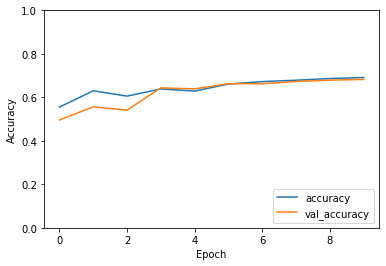

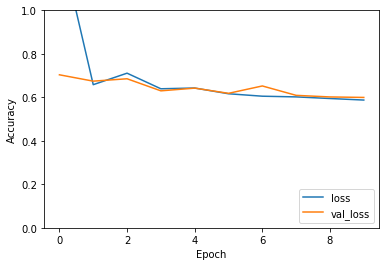

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(imgs_test,  labels_test, verbose=2)


In [41]:
# make predictions
hh_data_test    = np.asarray([x for x,y in zip(imgs_test, labels_test) if y==1])
hh_labels_test  = np.asarray([y for x,y in zip(imgs_test, labels_test) if y==1])
qcd_data_test   = np.asarray([x for x,y in zip(imgs_test, labels_test) if y==0])
qcd_labels_test = np.asarray([y for x,y in zip(imgs_test, labels_test) if y==0])

score_hh = model.evaluate(hh_data_test, hh_labels_test)
score_qcd = model.evaluate(qcd_data_test, qcd_labels_test)
print(score_hh, score_qcd)
pred_hh = model.predict(hh_data_test)
pred_qcd = model.predict(qcd_data_test)

2380/2380 [==============================] - 0s 191us/step
[0.585805111680149, 0.6971074342727661] [0.6135072315440459, 0.6672269105911255]


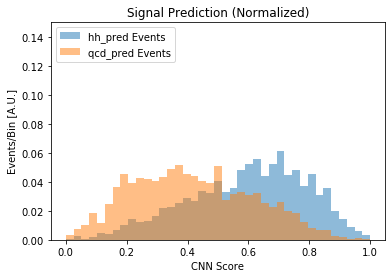

In [42]:
_nBins = 40
predictionResults = {'hh_pred':pred_hh, 'qcd_pred':pred_qcd}
compareManyHistograms( predictionResults, ['hh_pred', 'qcd_pred'], 2, 'Signal Prediction', 'CNN Score', 0, 1, _nBins, _yMax = 5, _normed=True, savePlot=False )


In [ ]:
# *** 4. Get best cut value for CNN assuming some minimal amount of signal
#returnBestCutValue('CNN', pred_hh.copy(), pred_qcd.copy(), _minBackground=400e3, _testingFraction=0.1)